## Observations and Insights

## Dependencies and starter code

In [126]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pandas import DataFrame
from pandas import Series
import statsmodels #FOR NEXT STEP -- RUNNING REGRESSIONS 
import statsmodels.api as sm
import statsmodels.formula.api as smf   #FOR USING 'R'-STYLE FORMULAS FOR REGRESSIONS
from scipy.stats import linregress


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Mouse data file
#print(mouse_metadata.head())

In [127]:
#full_df = pd.concat([mouse_metadata,study_results])
#full_df

In [128]:
# Combine the data into a single dataset
#unique_df = full_df.drop_duplicates(keep='last')
#unique_df

In [129]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [130]:
#combined_df_nodups = combined_df.drop_duplicates
#print(combined_df_nodups)

In [131]:
# Study data file
#print(study_results.head())

In [132]:
#mouse_metadata["Mouse ID"]

In [133]:
#study_results["Mouse ID"]

In [134]:
#mouse_metadata.duplicated(subset = "Mouse ID")

In [135]:
#study_results.duplicated(subset = "Mouse ID")

## Summary statistics

In [136]:
# Data Frame of Mouse
#mouse_df = pd.read_csv('data/Mouse_metadata.csv')
#print(len(mouse_df))
#mouse_df.head(2)

In [137]:
# Data Frame of Results
#results_df = pd.read_csv('data/Study_results.csv')
#print(len(results_df))
#results_df.head(2)

In [138]:
# show Mouse Data Frame columns
#mouse_df.columns

In [139]:
# show Result Data Frame columns
#results_df.columns

In [140]:
# make new data frames organized by drug regimen
# what drug regimens are there?
#drug_type = mouse_metadata[['Drug Regimen']].count()
#drug_type

In [141]:
#what drugs were used
drugs = combined_df['Drug Regimen'].value_counts()
drugs

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

In [142]:
# group by drug regimen
group = combined_df.groupby(["Drug Regimen"])
group

In [143]:
#mean
mean = group["Tumor Volume (mm3)"].mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [144]:
# median
median = group["Tumor Volume (mm3)"].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [145]:
# variance
variance = group["Tumor Volume (mm3)"].var()
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [146]:
#standard deviation
stdv = group["Tumor Volume (mm3)"].std()
stdv

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [147]:
#SEM
sem = group["Tumor Volume (mm3)"].sem()
sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [148]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#sst_df = pd.DataFrame({"Tumor Volume":[mean,median,variance,stdv,sem], "Regimen":['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']})
#sst_df

sst_df = pd.DataFrame({"mean":mean, "median":median, "variance":variance, "standard deviation":stdv, "SEM":sem}) 
sst_df

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [149]:
#

In [150]:
# Results summary statistics
#results_df.describe()

## Bar plots

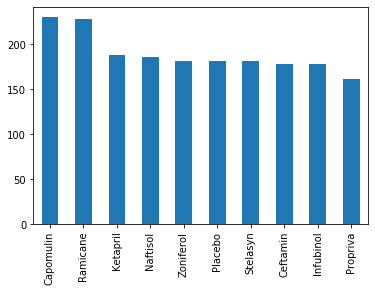

In [151]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drugs.plot.bar()

<BarContainer object of 10 artists>

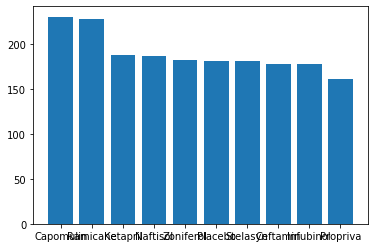

In [152]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drugtype = ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Placebo','Stelasyn','Ceftamin','Infubinol','Propriva',]
count = [230,228,188,186,182,181,181,178,178,161]
plt.bar(drugtype,count)

## Pie plots

In [153]:
# count how many female and male mice there are
sex = mouse_metadata['Sex'].value_counts()
sex

Male      125
Female    124
Name: Sex, dtype: int64

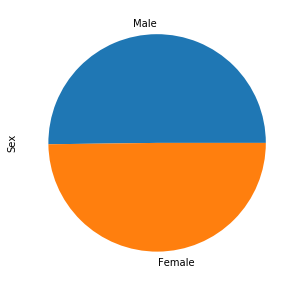

In [154]:

# Generate a pie plot showing the distribution of female versus male mice using pandas
sex.plot.pie(y='mass', figsize=(5, 5))


([<matplotlib.patches.Wedge at 0x7f7cec7d7950>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'male'),
  Text(0.006939175976765524, -1.0999781124353174, 'female')])

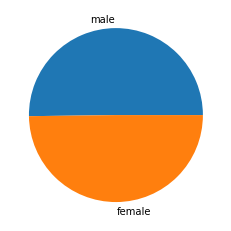

In [155]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sex_count = [125,124]
sex_label = ["male", "female"]
plt.pie(sex_count,labels=sex_label)



## Quartiles, outliers and boxplots

In [156]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# final tumor volume timepoint = 45 want results for this timepoint
# top 4
# Ramicane
# Capomulin
# Propriva
# Ceftamin
top_regimens = combined_df[combined_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

#final tumor volume
top_regimens_final_volume = top_regimens.groupby(["Drug Regimen","Mouse ID"]).tail(1)



In [157]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#quartiles = top_regimens.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#print(f"The lower quartile of results is: {lowerq}")
#print(f"The upper quartile of results is: {upperq}")
#print(f"The interquartile range of results is: {iqr}")
#print(f"The the median of results is: {quartiles[0.5]} ")

#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")

top_regimens_final_volume.describe()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,13.520000,23.710000,35.700000,47.197795,1.45000
std,7.608448,4.472802,14.442852,12.953884,1.14922
min,1.000000,15.000000,0.000000,22.050126,0.00000
25%,7.000000,20.000000,30.000000,37.187744,1.00000
50%,15.000000,25.000000,45.000000,45.000000,1.00000
75%,20.000000,27.250000,45.000000,59.930262,2.00000
max,24.000000,30.000000,45.000000,72.226731,4.00000


(10, 80)

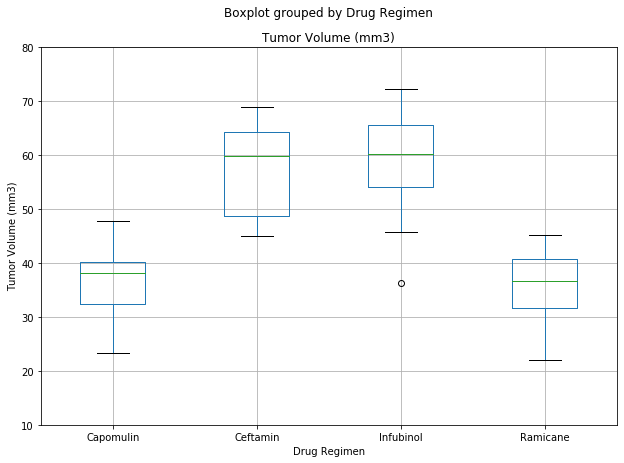

In [158]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

box_plot = top_regimens_final_volume.boxplot( by = "Drug Regimen", column = ["Tumor Volume (mm3)"], grid = True, figsize = (10,7))
box_plot.set_ylabel("Tumor Volume (mm3)")
box_plot.set_ylim(10,80)

## Line and scatter plots

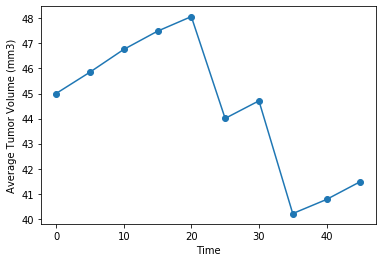

In [159]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Line Plot
capomulin = combined_df["Drug Regimen"]=="Capomulin"
mouse_in_question = combined_df["Mouse ID"]=="l509"
capomulin_plot = combined_df[capomulin & mouse_in_question]

x_values = capomulin_plot["Timepoint"]
y_values = capomulin_plot["Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)
plt.xlabel('Time')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(x_values,y_values)


In [160]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin2 = combined_df[combined_df["Drug Regimen"]=="Capomulin"]
capomulin2

#mouse_weight = combined_df["Weight (g)"]=="Capomulin"
#average_tumor_volume = combined_df.groupby[("Tumor Volume (mm3)").mean()]=="Capomulin"
#plt.scatter(mouse_weight,average_tumor_volume)
#plt.show()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [161]:
#group items
data_for_scatter = capomulin2.groupby(["Mouse ID", "Weight (g)"]).mean()
data_for_scatter

,,Age_months,Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,Weight (g),,,,
b128,22,9.0,22.5,41.963636,0.70
b742,21,7.0,22.5,40.083699,0.00
f966,17,16.0,10.0,36.505973,0.00
g288,19,3.0,22.5,41.990097,0.80
g316,22,22.0,22.5,44.613344,1.00
i557,24,1.0,22.5,44.805810,0.20
i738,20,23.0,22.5,39.141053,0.60
j119,23,7.0,22.5,44.465236,0.60
j246,21,21.0,17.5,43.216925,0.25


In [162]:
#reset index
data_for_scatter = data_for_scatter.reset_index()

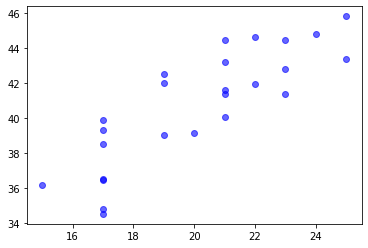

In [163]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# For the first example, determine which pairs of factors are correlated. 
#plt.scatter(data_for_scatter.iloc[:,0],data_for_scatter.iloc[:,4])
#plt.xlabel('Mouse Weight')
#plt.ylabel('Average Tumor Volume (mm3)')
#plt.show()
xValues = data_for_scatter["Weight (g)"]
yValues = data_for_scatter["Tumor Volume (mm3)"]
plt.scatter(xValues, yValues, alpha = 0.6, color = "blue")

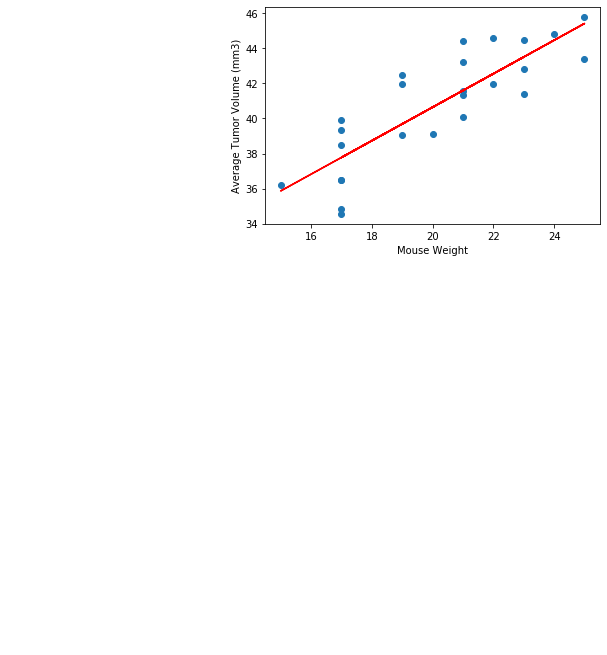

In [170]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [171]:
#Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
regress_values

0     42.549834
1     41.595394
2     37.777635
3     39.686515
4     42.549834
5     44.458713
6     40.640954
7     43.504273
8     41.595394
9     41.595394
10    39.686515
11    37.777635
12    39.686515
13    45.413153
14    37.777635
15    45.413153
16    37.777635
17    43.504273
18    37.777635
19    37.777635
20    41.595394
21    43.504273
22    41.595394
23    35.868756
24    37.777635
Name: Weight (g), dtype: float64

In [167]:
# correlation calculation
correlation = st.pearsonr(xValues,yValues)
correlation

(0.8419363424694716, 1.3225722434712883e-07)

In [168]:
print("The correlation between mouse weight and the average tumor volume is 0.84")

The correlation between mouse weight and the average tumor volume is 0.84


In [173]:
#Draw plot - not required
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.95x + 21.55'